In [1]:
!pip install wordcloud
!pip install catboost
!pip install lightgbm
!pip install xgboost
!pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.1/520.1 kB 14.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 25.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 9.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 63.9 MB/s eta

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, roc_curve
import lightgbm as lgb
import xgboost as xgb

In [3]:
analyze =pd.read_csv("/data/notebook_files/memes_metadata.csv")

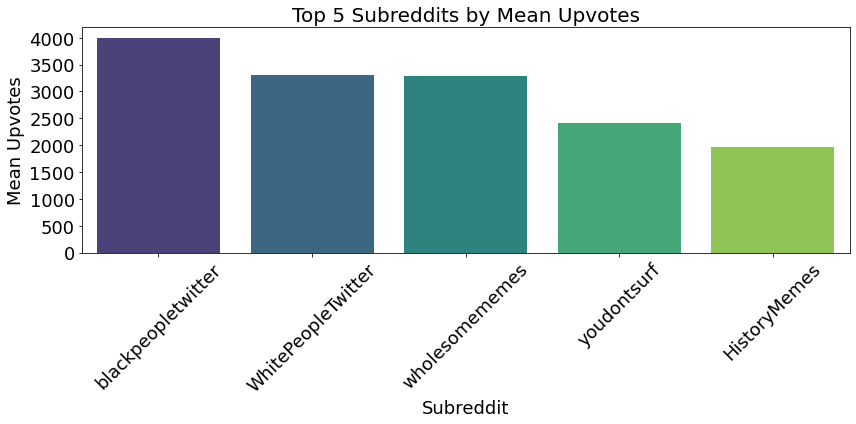

In [4]:


subreddit_upvotes = analyze.groupby('Subreddit')['Upvotes'].mean().reset_index()
subreddit_upvotes = subreddit_upvotes.sort_values(by='Upvotes', ascending=False)
top_subreddits = subreddit_upvotes.head(5)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_subreddits, x='Subreddit', y='Upvotes', palette='viridis')
plt.xlabel('Subreddit', fontsize=18)
plt.ylabel('Mean Upvotes', fontsize=18)
plt.title('Top 5 Subreddits by Mean Upvotes', fontsize=20)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.savefig('mean_upvotes_per_subreddit.jpeg', bbox_inches='tight')
plt.show()

In [5]:
mv =pd.read_csv("/data/notebook_files/metadata_with_features.csv")

<ipython-input-5-070e0411aabb>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  mv =pd.read_csv("/data/notebook_files/metadata_with_features.csv")


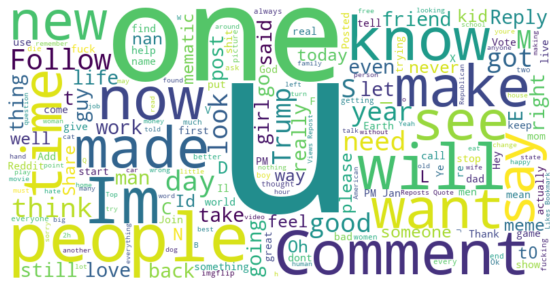

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(mv['Extracted_Text'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('wordcloud_image.png', bbox_inches='tight')

plt.show()

In [7]:
viral_analyze =pd.read_csv("/data/notebook_files/complete_viral_dataset.csv")

In [8]:
top_colors = viral_analyze['Top_Color_Name'].value_counts().head(10).index.tolist()

print("Top 10 Colors:")
print(top_colors)

Top 10 Colors:
['gray', 'darkslategray', 'dimgray', 'darkgray', 'silver', 'black', 'rosybrown', 'lightgray', 'gainsboro', 'whitesmoke']


In [9]:

colors_to_indicator = ['gray', 'darkslategray', 'dimgray', 'darkgray', 'silver', 'black', 'rosybrown', 'lightgray', 'gainsboro', 'whitesmoke', 'darkolivegreen', 'tan', 'lightslategray', 'lavender', 'sienna', 'slategray', 'linen', 'thistle', 'darkkhaki', 'darkslateblue']

for color in colors_to_indicator:
    viral_analyze[f'{color}_indicator'] = (viral_analyze['Top_Color_Name'] == color).astype(int)

In [10]:


variable_list = ["Thumbnail Height",
"Thumbnail Width",
"Average_Hue",
"Average_Saturation",
"Average_Value",
"Expression_ind",
"Objects_ind",
"object_count_multiple",
"object_count_no object",
"object_count_single",
"do_category_Other",
"do_category_accessory",
"do_category_animal",
"do_category_appliance",
"do_category_ball",
"do_category_clothing",
"do_category_container",
"do_category_device",
"do_category_food",
"do_category_furniture",
"do_category_human",
"do_category_object",
"do_category_plant",
"do_category_sports equipment",
"do_category_tool",
"do_category_toy",
"do_category_vehicle",
"Facial_Expression_angry",
"Facial_Expression_fear",
"Facial_Expression_happy",
"Facial_Expression_neutral",
"Facial_Expression_sad",
"Facial_Expression_surprise",
"Facial_Expression_unknown",
"meme_text_sentiment_NEGATIVE",
"meme_text_sentiment__NEUTRAL",
"meme_text_sentiment__POSITIVE",
"meme_text_sentiment__Unknown",
"Time_12am-3am",
"Time_12pm-3pm",
"Time_3am-6am",
"Time_3pm-6pm",
"Time_6am-9am",
"Time_6pm-9pm",
"Time_9am-12pm",
"Time_9pm-12am",
"call_to_action_ind",
"submission_text_ind",
"NSFW_ind",
"title_word_count",
"title_sentiment_Negative",
"title_sentiment_Positive",
"Height/Width Ratio",
"Width*Height Product",
"gray_indicator",
"darkslategray_indicator",
"dimgray_indicator",
"darkgray_indicator",
"silver_indicator",
"black_indicator",
"rosybrown_indicator",
"lightgray_indicator",
"gainsboro_indicator",
"whitesmoke_indicator",
"darkolivegreen_indicator",
"tan_indicator",
"lightslategray_indicator",
"lavender_indicator",
"sienna_indicator",
"slategray_indicator",
"linen_indicator",
"thistle_indicator",
"darkkhaki_indicator",
"darkslateblue_indicator"
] 
y = viral_analyze['viral_q'] 

results_df = pd.DataFrame(columns=["Variable", "Coef", "StdErr", "z", "P>|z|", "[0.025", "0.975]"])

for var in variable_list:
    X = viral_analyze[[var]] 

    X.fillna(X.mean(), inplace=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    X_train_with_intercept = sm.add_constant(X_train)
    logreg_sm = sm.Logit(y_train, X_train_with_intercept)
    result = logreg_sm.fit()

    summary_df = pd.read_html(result.summary().tables[1].as_html(), header=0, index_col=0)[0]
    summary_df.reset_index(inplace=True)
    summary_df.rename(columns={'index': 'Variable'}, inplace=True)
    summary_df['Variable'] = var  # Specify the variable name for clarity

    results_df = pd.concat([results_df, summary_df], ignore_index=True)

results_df.to_csv("logistic_regression_results.csv", index=False)

Optimization terminated successfully.
         Current function value: 0.691535
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.688838
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692082
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.690846
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683938
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692989
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.691412
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.687472
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691412
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.691440
  

<ipython-input-10-32a6555f0b77>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-10-32a6555f0b77>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-10-32a6555f0b77>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

<ipython-input-11-99f317749843>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


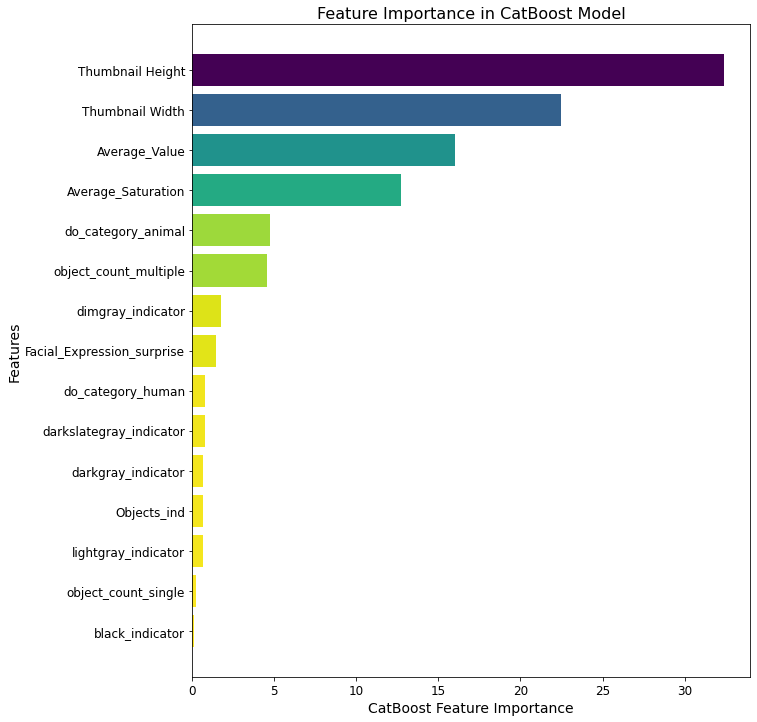

In [11]:



X = viral_analyze[['object_count_multiple', 'object_count_single', 'Objects_ind', 
                      'Facial_Expression_surprise', 'do_category_human', 'Average_Saturation',
                      'Average_Value', 
                      'darkslategray_indicator',
                      'dimgray_indicator','darkgray_indicator','black_indicator','lightgray_indicator',
                      'Thumbnail Height', 'Thumbnail Width',
                      'do_category_animal'
]]
y = viral_analyze['viral_q']

X.fillna(X.mean(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

depth = 3
learning_rate = 0.1

catboost_params = {
    'iterations': 500,
    'learning_rate': learning_rate,
    'depth': depth,
    'loss_function': 'Logloss',
    'verbose': 0,
    'random_seed': 42
}

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool, eval_set=test_pool, verbose=False)

y_pred1 = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred1)

feature_importance = model.get_feature_importance()
feature_names = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 12))  


colors = plt.cm.viridis_r((feature_importance[sorted_idx] - min(feature_importance[sorted_idx])) /
                           (max(feature_importance[sorted_idx]) - min(feature_importance[sorted_idx])))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], color=colors)
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])

plt.xlabel('CatBoost Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance in CatBoost Model', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('feature_importance_plot.jpeg', bbox_inches='tight', dpi=300)

plt.show()

NameError: NameError: name 'y_pred' is not defined

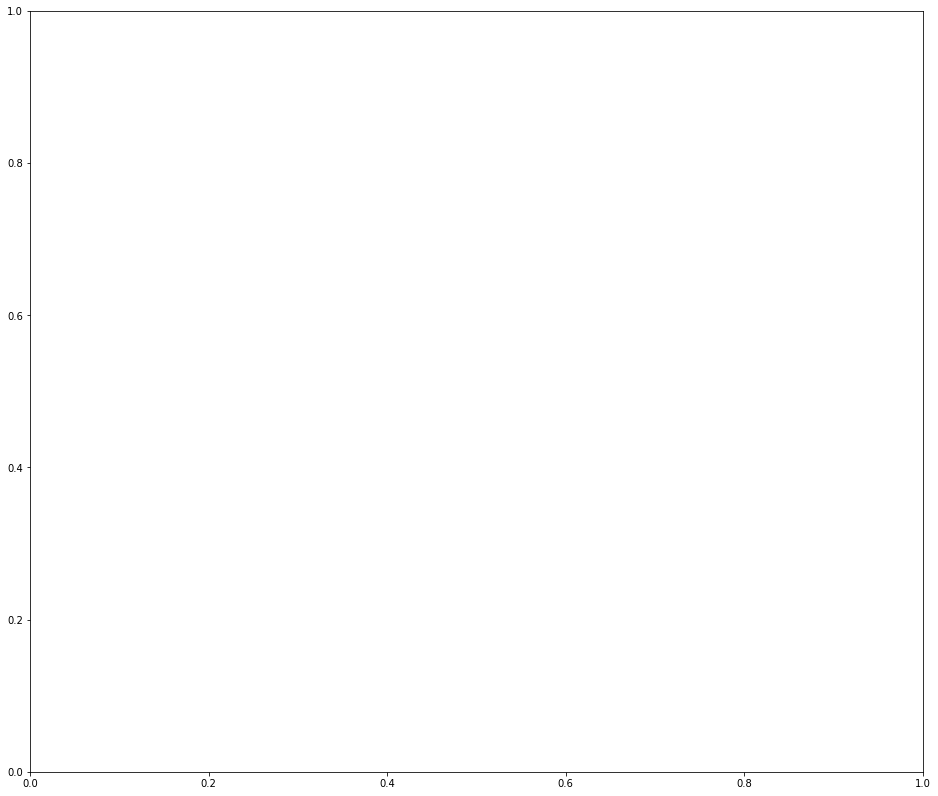

In [12]:

roc_auc = roc_auc_score(y_test, y_pred1)

fig, ax = plt.subplots(figsize=(16, 14))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('auc_roc_curve.jpeg', bbox_inches='tight')

plt.show()

print(f'ROC AUC Score: {roc_auc}')
print(f'Best Hyperparameters: Depth={depth}, Learning Rate={learning_rate}')

In [13]:


X = viral_analyze[['title_sentiment_Positive','title_sentiment_Negative',"title_word_count","meme_text_sentiment__POSITIVE",
                       'call_to_action_ind','submission_text_ind'
]]
y = viral_analyze['viral_q']

X.fillna(X.mean(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

depth = 3
learning_rate = 0.1

catboost_params = {
    'iterations': 500,
    'learning_rate': learning_rate,
    'depth': depth,
    'loss_function': 'Logloss',
    'verbose': 0,
    'random_seed': 42
}

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool, eval_set=test_pool, verbose=False)

y_pred2 = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred2)

feature_importance = model.get_feature_importance()
feature_names = X.columns
sorted_idx = feature_importance.argsort()


<ipython-input-13-4c18f1f52605>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-13-4c18f1f52605>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-13-4c18f1f52605>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

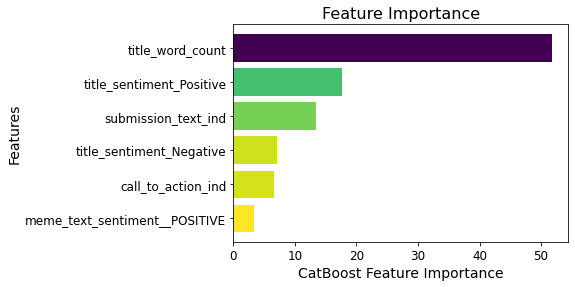

In [14]:

colors = plt.cm.viridis_r((feature_importance[sorted_idx] - min(feature_importance[sorted_idx])) /
                          (max(feature_importance[sorted_idx]) - min(feature_importance[sorted_idx])))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], color=colors)

plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], fontsize=12)

plt.xlabel('CatBoost Feature Importance', fontsize=14)

plt.ylabel('Features', fontsize=14)  


plt.title('Feature Importance', fontsize=16)  
plt.xticks(fontsize=12)

plt.savefig('feature_importance_plot_text.jpeg', bbox_inches='tight')

plt.show()

ROC AUC Score: 0.7263363800027696
Best Hyperparameters: Depth=3, Learning Rate=0.1


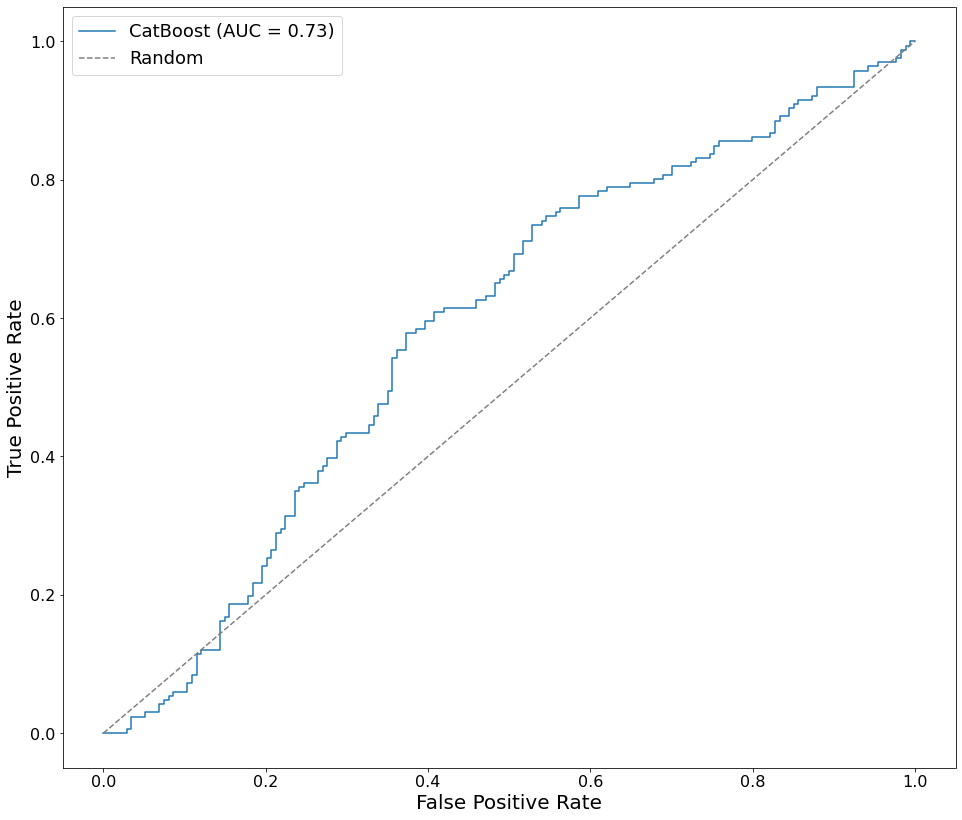

In [15]:

roc_auc = roc_auc_score(y_test, y_pred2)

fig, ax = plt.subplots(figsize=(16, 14))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)

plt.legend(fontsize=18)

ax.tick_params(axis='both', labelsize=16)

plt.savefig('auc_text.jpeg', bbox_inches='tight')

plt.show()

print(f'ROC AUC Score: {roc_auc}')
print(f'Best Hyperparameters: Depth={depth}, Learning Rate={learning_rate}')

In [16]:


X = viral_analyze[['object_count_multiple', 'object_count_single', 'Objects_ind', 
                      'Facial_Expression_surprise', 'do_category_human', 'Average_Saturation',
                      'Average_Value', 
                      'darkslategray_indicator',
                      'dimgray_indicator','darkgray_indicator','black_indicator','lightgray_indicator',
                      'Thumbnail Height', 'Thumbnail Width',
                      'do_category_animal','title_sentiment_Positive','title_sentiment_Negative',"title_word_count","meme_text_sentiment__POSITIVE",
                       'call_to_action_ind','submission_text_ind'
]]
y = viral_analyze['viral_q']

X.fillna(X.mean(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_pool = Pool(X_train, label=y_train)
test_pool = Pool(X_test, label=y_test)

depth = 3
learning_rate = 0.1

catboost_params = {
    'iterations': 500,
    'learning_rate': learning_rate,
    'depth': depth,
    'loss_function': 'Logloss',
    'verbose': 0,
    'random_seed': 42
}

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool, eval_set=test_pool, verbose=False)

y_pred3 = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred3)

feature_importance = model.get_feature_importance()
feature_names = X.columns
sorted_idx = feature_importance.argsort()


<ipython-input-16-86f91a62dbf4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


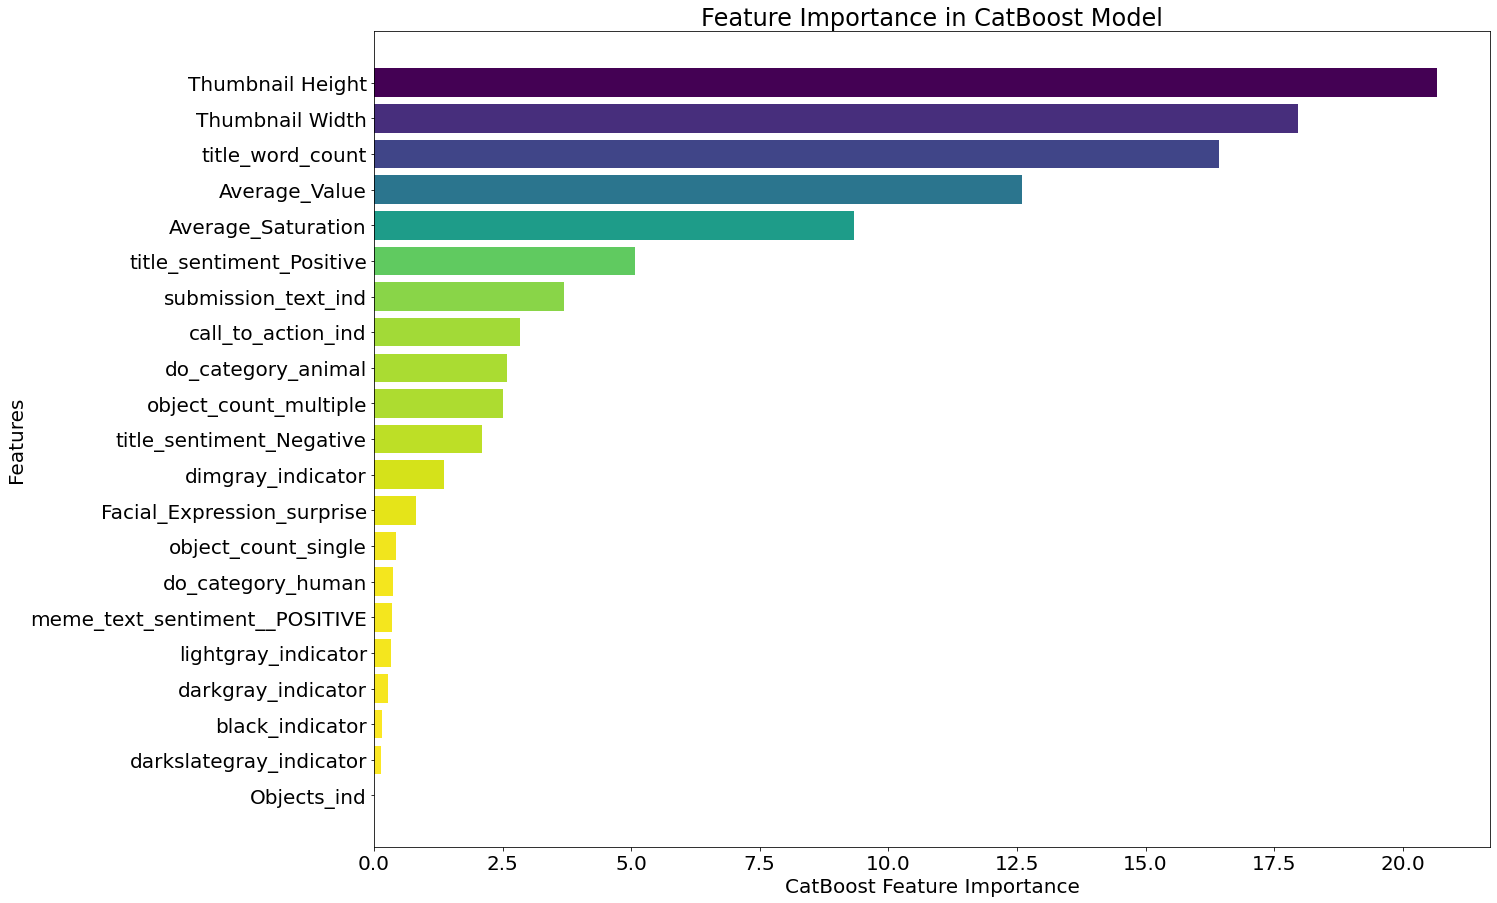

In [17]:
import matplotlib.pyplot as plt


top_n = 30  
sorted_idx_top_n = sorted_idx[-top_n:]  

fig, ax = plt.subplots(figsize=(20, 15))  # Adjust width and height as needed


colors = plt.cm.viridis_r((feature_importance[sorted_idx_top_n] - min(feature_importance[sorted_idx_top_n])) /
                          (max(feature_importance[sorted_idx_top_n]) - min(feature_importance[sorted_idx_top_n])))

plt.barh(range(len(sorted_idx_top_n)), feature_importance[sorted_idx_top_n], color=colors)
plt.yticks(range(len(sorted_idx_top_n)), [feature_names[i] for i in sorted_idx_top_n], fontsize=20)  # Increased font size
plt.xlabel('CatBoost Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=20)
plt.title('Feature Importance in CatBoost Model', fontsize=24)  # Assuming top 30 for readability

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('combined_feature_importance_plot.jpeg', bbox_inches='tight', dpi=300)

plt.show()

ROC AUC Score: 0.773819415593408
Best Hyperparameters: Depth=3, Learning Rate=0.1


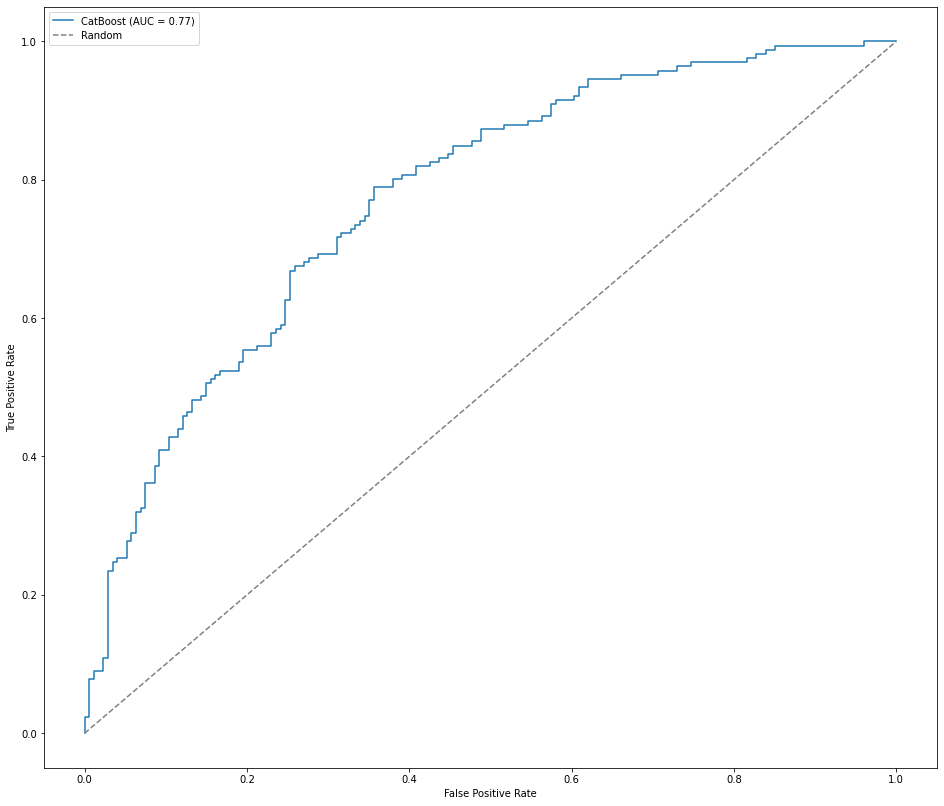

In [18]:

from sklearn.metrics import roc_auc_score, roc_curve

fig, ax = plt.subplots(figsize=(16, 14))

fpr, tpr, _ = roc_curve(y_test, y_pred3)
plt.plot(fpr, tpr, label='CatBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.savefig('zzzzzz.jpeg', bbox_inches='tight')

plt.show()


print(f'ROC AUC Score: {roc_auc}')
print(f'Best Hyperparameters: Depth={depth}, Learning Rate={learning_rate}')

In [19]:

pd.DataFrame({'y_test': y_test, 'y_pred1': y_pred1, 'y_pred2': y_pred2}).to_csv('data_for_r.csv', index=False)

In [20]:

pd.DataFrame({'y_test': y_test, 'y_pred1': y_pred1, 'y_pred3': y_pred3}).to_csv('data_for_r2.csv', index=False)

In [21]:

pd.DataFrame({'y_test': y_test, 'y_pred2': y_pred2, 'y_pred3': y_pred3}).to_csv('data_for_r3.csv', index=False)

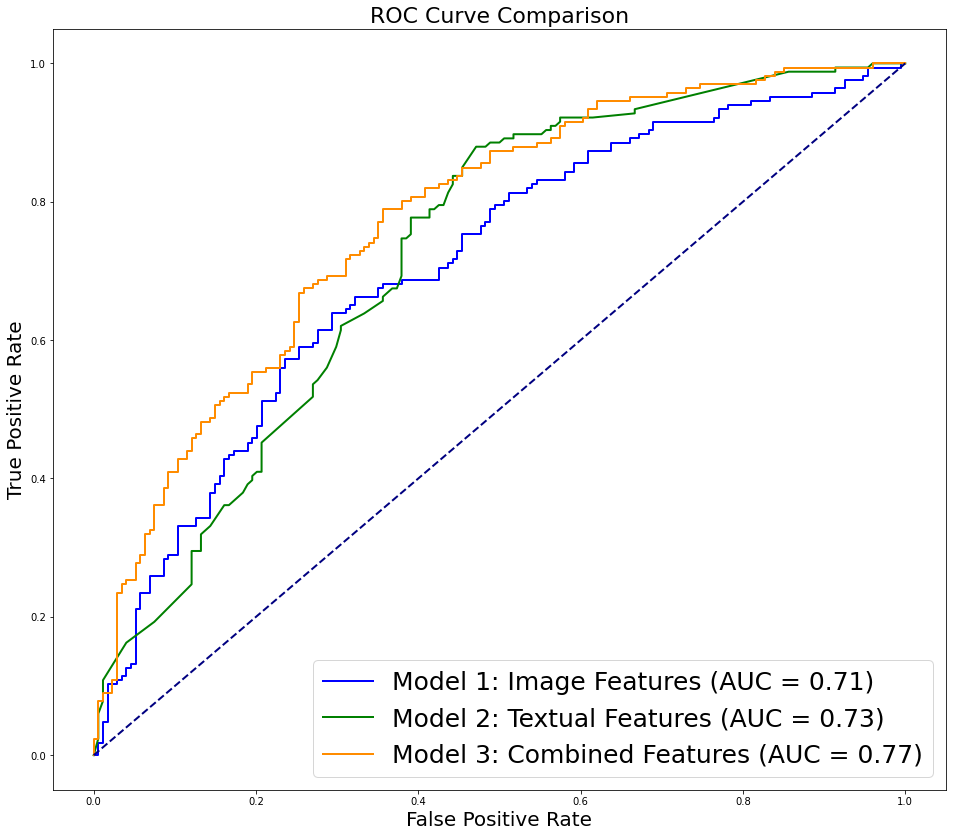

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(16, 14))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'Model 1: Image Features (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Model 2: Textual Features (AUC = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label=f'Model 3: Combined Features (AUC = {roc_auc3:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC Curve Comparison', fontsize=22)

plt.legend(loc="lower right", fontsize=25)

plt.savefig('ROC_Curve_Comparison.jpeg', bbox_inches='tight', dpi=300)

plt.show()

In [23]:


X = viral_analyze[['object_count_multiple', 'object_count_single', 'Objects_ind', 
                   'Facial_Expression_surprise', 'do_category_human', 'Average_Saturation',
                   'Average_Value', 
                   'darkslategray_indicator', 'dimgray_indicator','darkgray_indicator','black_indicator','lightgray_indicator',
                   'Thumbnail Height', 'Thumbnail Width',
                   'do_category_animal', 'title_sentiment_Positive', 'title_sentiment_Negative',
                   "title_word_count", "meme_text_sentiment__POSITIVE",
                   'call_to_action_ind', 'submission_text_ind']]
y = viral_analyze['viral_q']

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

d_train = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.1,
    'random_state': 42
}

model_lgb = lgb.train(params, d_train, 100)

y_pred_lgb = model_lgb.predict(X_test)

auc_lgb = roc_auc_score(y_test, y_pred_lgb)
print(f'ROC AUC Score for LightGBM: {auc_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 682, number of negative: 678
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 1360, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501471 -> initscore=0.005882
[LightGBM] [Info] Start training from score 0.005882
ROC AUC Score for LightGBM: 0.7136823154687717


<ipython-input-23-06127a3be823>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [24]:


X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.1,
    'seed': 42
}

model_xgb = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = model_xgb.predict(dtest)

auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f'ROC AUC Score for XGBoost: {auc_xgb}')

ROC AUC Score for XGBoost: 0.7300927849328348


<ipython-input-24-93cc1ca2b04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [25]:

viral_analyze.to_csv('viral_analyze.csv', index=False)